<a href="https://colab.research.google.com/github/SebastianYanezV/ADA-Informes/blob/main/Informe_6_Corte_de_varillas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Descripción del problema: Problema de corte de varillas

**Entrada:** Largo de varilla $n$ y un vector de precios para cada medida $i=1..n$

**Salida:**  Retorno máximo $r_n$ que se puede obtener cortando la varilla y vendiendo las partes.

El problema que se busca resolver en este caso, corresponde al problema de corte de varillas, el cual consiste en encontrar la máxima gananacia posible que se puede conseguir al cortar una varilla de largo $n$ y vender sus partes. Para resolver este problema, se utilizará el algoritmo *Cut Rod*, el cual se encarga de buscar la máxima gananacia posible luego de analizar las ganancias de cada corte posible. 

# 2. Cut Rod

## 2.1 Código

Los códigos que se muestran a continuación pertenecen a las dos implementaciones del algoritmo *CutRod*.

### 2.1.1 Cut Rod recursivo

In [1]:
llamadas = 0

def cutRodRecursivo(precios, largo, verbose = False):
  #Caso base
  if (largo == 0): 
    if verbose == True: print("Caso base: se retorna 0, ya que una varilla de este largo no genera ganancia.")
    return 0;

  valorMaximo = -999999

  #Se recorre la varilla desde un largo 1 hasta el largo ingresado para calcular el valor máximo de cada largo
  for i in range(1, largo + 1):
    global llamadas
    llamadas += 1
    if verbose == True: print(f"Se hace el corte de varilla de una varilla de largo {largo-i}.")
    #Se calcula el valor máximo de forma recursiva
    valorMaximo = max(valorMaximo, precios[i-1] + cutRodRecursivo(precios, largo - i))
    if verbose == True: print(f"Máxima ganancia encontrada hasta ahora: {valorMaximo}")


  if verbose == True: print(f"Se retorna {valorMaximo} como máxima ganancia.")
  if verbose == True: print("------------------------------------------------------")
  return valorMaximo

A = [1, 5, 8, 9, 10, 17, 17, 20]
gananciaMayor = cutRodRecursivo(A, len(A))
print("Maxima ganancia:", gananciaMayor)
print("LLamadas recursivas realizadas:", llamadas)

Maxima ganancia: 22
LLamadas recursivas realizadas: 255


### 2.1.2 Cut Rod Bottom-Up

In [2]:
subProblemas = 0

def cutRod(precios, largo, verbose = False):
  #Se crean e inicializan los arreglos que almacenarán las ganancias máximas y los cortes necesarios para cada ganancia máxima
  valores = [0 for x in range(largo + 1)]
  cortes = [0 for x in range(largo + 1)]
  valores[0] = 0
  
  #Se trabaja con una varilla de largo "i" 
  for i in range(1, largo + 1):
    if verbose == True: print(f"Se evalúa una varilla de largo máximo igual a {i}.")
    valorMaximo = -999999
    
    #Se divide la varilla de largo "i" en dos varillas de largo "j" y "i-j-1" y se calcula la ganancia máxima entre ambas
    for j in range(i): 
      if verbose == True: print(f"Caso {j+1}: la varilla es de largo {j+1}.")
      global subProblemas
      subProblemas += 1
      if (valorMaximo < precios[j] + valores[i-j-1]): 
        if verbose == True: print(f"Valor máximo hasta ahora: {valorMaximo}")
        if verbose == True: print(f"La máxima ganancia es el mayor valor entre {valorMaximo} y {precios[j] + valores[i-j-1]} ({precios[j]} (Precio por largo {j+1}) + {valores[i-j-1]} (Arreglo de máximas ganancias en la posición {i-j-1}))")
        valorMaximo = max(valorMaximo, precios[j] + valores[i-j-1])
        if verbose == True: print(f"Máxima ganancia encontrada hasta ahora: {valorMaximo}")
        cortes[i] = j
    
      if verbose == True: print("------------------------------------------------------") 
    #Se almacena la ganancia máxima para la varilla de largo "i"
    valores[i] = valorMaximo 

  return valores[largo], cortes

A = [1, 5, 8, 9, 10, 17, 17, 20]
gananciaMayor, cortes = cutRod(A, len(A))
print("Maxima ganancia:", gananciaMayor)
print("Cantidad de sub-problemas resuletos:", subProblemas)
print("Cortes:", cortes[len(A)])

Maxima ganancia: 22
Cantidad de sub-problemas resuletos: 36
Cortes: 1


## 2.2 Descripción del algoritmo

Antes de describir el funcionamiento del algoritmo, se explicará que es la **sub-estructura óptima** del problema y la **función recursiva** para el retorno máximo.

**Sub-estructura óptima:** Soluciones óptimas a un problema incorporan soluciones óptimas a sub-problemas relacionados que se pueden resolver de forma independiente. Como el problema de la varilla se basa en realizar un corte, analizar las ganancias posibles luego de realizar el corte y finalmente encontrar la ganancia máxima al "construir" esta solución en base a las soluciones óptimas de los demás cortes (sub-problemas), se puede decir que este problema efectivamente posee una sub-estructura óptima, y por ende, se puede resolver utilizando programación dinámica, como se demostró con el código anterior. 

**Función recursiva para el retorno máximo:** El retorno máximo $r_n$ para un problema de largo $n$ puede estar dado por el precio de la varilla completa $p_n$, o el precio de una sub-varilla $p_i$, más el retorno máximo $r_{n-i}$ de la varilla restante.

$r_n=\max\limits_{i=1..n}(p_i+r_{n-i})$, considerando que $r_0=0$

A continuación se describirá el funcionamiento del algoritmo para cada una de sus implementaciones.

### 2.2.1 Descripción del algoritmo recursivo

Antes de empezar a buscar la máxima ganancia al cortar la varilla, el algoritmo recibe un arreglo con precios para cada corte de varilla y un largo $n$ de una varilla.

1. Se entra en un ciclo iterativo con el fin de calcular la máxima ganancia posible para cada largo de la varilla (desde largo 1 hasta el largo ingresado).

2. Para calcular la ganancia máxima cada vez, el algoritmo se llama a si mismo de forma recursiva con el fin de resolver todos los sub-problemas para un largo de varilla $i$ (estos sub-problemas se refieren a encontrar cada precio de venta que se puede obtener con un largo de varilla determinado, para luego retornar al mayor de estos precios).

3. Los pasos anteriores se repiten hasta que se calcule la máxima ganancia obtenible por la venta de una varilla del largo ingresado.

Finalmente, al terminar el proceso anterior, se retorna la mayor ganancia que se puede obtener al cortar la varilla ingresada.

### 2.2.2 Descripción del algoritmo Bottom-Up

Antes de empezar a buscar la máxima ganancia al cortar la varilla, el algoritmo recibe un arreglo con precios para cada corte de varilla y un largo $n$ de una varilla.

1. Se crea un arreglo en el que se almacenarán las ganancias máximas de cada corte posible. Su primera posición se inicializa en 0, ya que una varilla de largo 0 no genera ganancia.

2. Luego se entra a los ciclos iterativos y se resuelve cada sub-problema de tamaño $i$, para $i = 1, 2, ..., n$ con el fin de encontrar la ganancia máxima de cada uno.

3. Al salir del ciclo interno cada vez, se guarda la máxima ganancia calculada en el arreglo de valores.

4. En último lugar, se retorna la posición n-ésima del arreglo de valores (o ganancias máximas), posición que corresponde al largo de la varilla indicado en un principio.

Finalmente, al terminar el proceso anteriormente descrito, el algoritmo retorna la mayor ganancia que se puede obtener al cortar la varilla ingresada.

## 2.3 Ejemplo

Nota: en el siguiente ejemplo se muestra el funcionamiento del algoritmo en su versión de programación dinámica, ya que esta es mucho más eficiente que su versión recursiva.

Se ingresa el siguiente arreglo de valores y el largo de la varilla a evaluar:

A = [1, 5, 8, 9, 10, 17, 17, 20]

Largo varilla = 3


Se entra a la función *CutRod* y ocurre el siguiente procedimiento:

1. Se crea un arreglo de ganancias, en el cuál se irán guardando las máximas ganancias que se pueden obtener con cada largo de la varilla.

  Ganancias = [0, 0, 0, 0, 0, 0, 0, 0, 0]

2. Se empieza a analizar cada caso posible de ganancia de la varilla, desde 0 hasta el largo ingresado.

3. Primero se analiza la ganancia de una varilla de largo máximo igual a 1. Una varilla de largo 1 sólo tiene una opción de venderse. De forma completa, su ganacia máxima es igual a 1. Se actualiza el arreglo de ganancias.

  Ganancias = [0, 1, 0, 0, 0, 0, 0, 0, 0]

4. En segundo lugar, se analiza la ganancia de una varilla de largo máximo igual a 2. Para este largo hay 2 casos posibles:

  4.1 La varilla se divide en dos partes de largo 1, lo que generaría una ganancia igual a 2.

  4.2 La varilla se vende completa (sin cortarse), la ganancia es igual a 5.

  4.3 La ganancia por la venta sin cortar es mayor a la ganancia de la venta por partes, por lo que la máxima ganancia para el largo 2 es igual a 5.

  Ganancias = [0, 1, 5, 0, 0, 0, 0, 0, 0]

5. En último lugar, se analiza la ganancia de una varilla de largo máximo igual a 3. Para este largo hay 3 casos posibles:

  5.1 La varilla se divide en tres partes de largo 1, lo que generaría una ganancia igual a 3.

  5.2 La varilla se divide en dos partes, una de largo 1 y otra de largo 2, lo que generaría una ganancia igual a 6.

  5.3 La varilla se vende completa (sin cortarse), la ganancia es igual a 8.

  5.4 La ganancia por la venta sin cortar es mayor a los demás casos posibles de ventas, por lo que la máxima ganancia para el largo 3 es igual a 8.

Finalmente, se encontró la ganancia máxima para una varilla de largo 3, por lo que se retorna este valor, el cúal es igual a 8.

## 2.4 Ejecución del algoritmo paso a paso

### 2.4.1 Cut Rod recursivo

In [ ]:
llamadas = 0
A = [1, 5, 8, 9, 10, 17, 17, 20]
print("Arreglo de entrada:", A)
print("------------------------------------------------------")
tamanoVarilla = 3
gananciaMayor = cutRodRecursivo(A, tamanoVarilla, verbose = True)
print("Maxima ganancia:", gananciaMayor)
print("LLamadas recursivas realizadas:", llamadas)

Arreglo de entrada: [1, 5, 8, 9, 10, 17, 17, 20]
------------------------------------------------------
Se hace el corte de varilla de una varilla de largo 2.
Se hace el corte de varilla de una varilla de largo 1.
Se hace el corte de varilla de una varilla de largo 0.
Caso base: se retorna 0, ya que una varilla de este largo no genera ganancia.
Máxima ganancia encontrada hasta ahora: 1
Se retorna 1 como máxima ganancia.
------------------------------------------------------
Máxima ganancia encontrada hasta ahora: 2
Se hace el corte de varilla de una varilla de largo 0.
Caso base: se retorna 0, ya que una varilla de este largo no genera ganancia.
Máxima ganancia encontrada hasta ahora: 5
Se retorna 5 como máxima ganancia.
------------------------------------------------------
Máxima ganancia encontrada hasta ahora: 6
Se hace el corte de varilla de una varilla de largo 1.
Se hace el corte de varilla de una varilla de largo 0.
Caso base: se retorna 0, ya que una varilla de este largo no g

Como se puede ver en el ejemplo anterior, la versión recursiva de este algoritmo se basa en llegar hasta una varilla de largo 0 (caso base) y luego ir calculando la ganancia máxima posible para cada largo hasta el largo ingresado al inicio. Luego de hacer estos cálculos, se retorna la máxima ganancia posible para el largo de varilla indicado.

### 2.4.2 Cut Rod Bottom-Up

In [ ]:
subProblemas = 0
A = [1, 5, 8, 9, 10, 17, 17, 20]
print("Arreglo de entrada:", A)
print("------------------------------------------------------")
tamanoVarilla = 3
gananciaMayor, cortes = cutRod(A, tamanoVarilla, verbose = True)
print("Maxima ganancia:", gananciaMayor)
print("Cantidad de sub-problemas resuletos:", subProblemas)

Arreglo de entrada: [1, 5, 8, 9, 10, 17, 17, 20]
------------------------------------------------------
Se evalúa una varilla de largo máximo igual a 1.
Caso 1: la varilla es de largo 1.
Valor máximo hasta ahora: -999999
La máxima ganancia es el mayor valor entre -999999 y 1 (1 (Precio por largo 1) + 0 (Arreglo de máximas ganancias en la posición 0))
Máxima ganancia encontrada hasta ahora: 1
------------------------------------------------------
Se evalúa una varilla de largo máximo igual a 2.
Caso 1: la varilla es de largo 1.
Valor máximo hasta ahora: -999999
La máxima ganancia es el mayor valor entre -999999 y 2 (1 (Precio por largo 1) + 1 (Arreglo de máximas ganancias en la posición 1))
Máxima ganancia encontrada hasta ahora: 2
------------------------------------------------------
Caso 2: la varilla es de largo 2.
Valor máximo hasta ahora: 2
La máxima ganancia es el mayor valor entre 2 y 5 (5 (Precio por largo 2) + 0 (Arreglo de máximas ganancias en la posición 0))
Máxima ganancia 

Como se puede ver en el ejemplo anterior, cuándo se utiliza programación dinámica para resolver este algoritmo, el procedimiento es similar a su versión recursiva, sin embargo, aquí sólo calcula cada ganancia una sola vez, a diferencia de la versión recursiva en la que las ganancias se pueden calcular múltiples veces (lo que es innecesario). Lo que realiza este algoritmo es lo siguiente. Va revisando cada largo de varilla, desde 1 hasta el largo ingresado al inicio y calcula cada ganancia posible para cada largo (por ejemplo, para largo 2, encuentra ganancias de 2 y 5) y luego guarda la que es mayor, ya que busca la mayor ganancia posible. Finalmente, retorna la ganancia máxima encontrada para el largo de varilla indicado.

# 3. Tiempo de ejecución

## Teorema: tiempo de ejecución

El algoritmo *CutRod* tiene un tiempo de ejecución de $O(n^2)$ en su **peor caso**.

## Prueba del teorema

Para probar la veracidad del teorema anterior, primero se debe definir una función matemática que describa la cantidad de sub-problemas que se deben resolver en función del tamaño de entrada $n$, la cuál es la siguiente:

$T(n)=\sum\limits_{i=1}^{n+1}\sum\limits_{j=0}^{i}c$

Como se puede ver, esta función se compone de 2 sumatorias, las cuáles corresponden al largo máximo de cada varilla, desde 1 hasta el largo ingresado y a los sub-problemas de cada varilla, en los que se calcula la ganancia máxima para cada largo de la varilla.

$T(n)=c\sum\limits_{i=1}^{n+1}j$

$T(n)=c*n(n+1)/2$

Al resolver la sumatoria, se concluye que:

$T(n) = O(n^2)$

Gracias a función matemática anterior, podemos encontrar el tiempo de ejecución de cada sub-problema, el cuál es igual a $O(n)$ para cada uno. 

Finalmente, como el algoritmo *CutRod* basa su funcionamiento en dos sumatorias de $O(n)$ (funciona gracias a dos ciclos "for" anidados), cada una con un tiempo de ejecución igual a $O(n)$, se puede comprobar que su tiempo de ejecución es de $O(n^2)$.

## Complejidad espacial del algoritmo

El algoritmo *CutRod* tiene una complejidad espacial de $O(n)$. Esto se debe a que este algoritmo utiliza un arreglo de largo $n$ (largo de la varilla) en el que va almacenando la ganancia máxima de venta de cada largo de la varilla desde 0 hasta $n + 1$.

# 4. Correctitud

## Teorema: correctitud del algoritmo Cut Rod

El algoritmo *CutRod* recibe un arreglo de precios de venta para cada largo de varilla y un largo de varilla específico y retorna la máxima ganancia posible que se puede obtener al vender una varilla del largo ingresado al principio.

## Prueba del teorema

Para poder comprobar el teorema anterior se utilizará inducción matemática.

**Caso base (n = 0)**

Cuándo el largo de varilla ingresado es igual a 0, se retorna 0 inmediatamente ya que una varilla de este largo no puede generar ganancia alguna.

**Paso inductivo (n > 0)**

Para casos en los que la varilla tiene un largo mayor a 0, existen 2 opciones que derivan de la siguiente línea de código:

    valorMaximo = max(valorMaximo, precios[j] + valores[i-j-1])

1. Cuándo "precios[ j ] + valores[i - j - 1]" es mayor que "valorMaximo", se asume que el sub-problema (precios[ j ] + valores[i - j - 1]) ya fué resuelto en iteraciones anteriores, por lo que se obtiene la ganancia máxima.

2. Cuándo "valorMaximo" es mayor o igual, se obtiene la máxima ganancia por el largo de la varilla que se está evaluando en el momento.

**Correctitud**

Finalmente, como el caso base y paso inductivo son correctos, se concluye que el teorema de correctitud del algoritmo es correcto.

# 5. Experimentos

## 5.1 Cut Rod Bottom-Up v/s Cut Rod recursivo (tiempo de ejecución)

En los gráficos que se muestran a continuación se visualizan los tiempos de ejecución de los algoritmos *CutRod* y *CutRodRecursivo* en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre 10 y 500 (para *CutRod*) y 10 y 20 (para *CutRodRecursivo*).

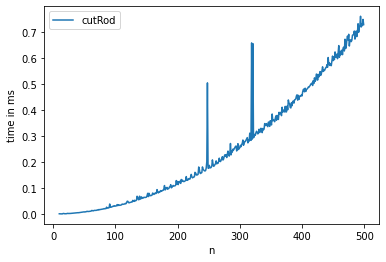

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]

for n in range(10,500):

  a = random.sample(range(1, 1000), n)

  #la función repeat está ejecutando 20 veces cutRod con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import cutRod", stmt=f"cutRod({a}, {len(a)})", repeat=1, number=20)

  x.append(n)
  y.append(t)


plt.plot(x,y)
plt.legend(["cutRod"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

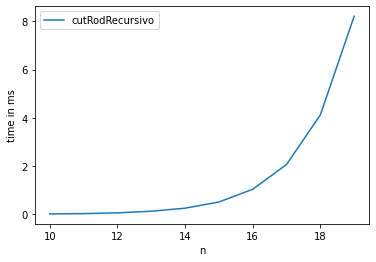

In [ ]:
z=[]; w=[]

for n in range(10,20):

  a = random.sample(range(1, 1000), n)

  #la función repeat está ejecutando 20 veces cutRodRecursivo con el arreglo a y retorna el mejor tiempo obtenido.
  t2 = repeat(setup="from __main__ import cutRodRecursivo", stmt=f"cutRodRecursivo({a}, {len(a)})", repeat=1, number=20)

  z.append(n)
  w.append(t2)


plt.plot(z,w)
plt.legend(["cutRodRecursivo"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Análisis de resultados

Como se puede notar en los gráficos anteriores, la implementación *Bottom-Up* del algoritmo *CutRod* es considerablemente más eficiente que su implementación recursiva. Lo anterior se debe a que la primera, debido a la forma que funciona, tiene una complejidad cuadrática de $O(n^2)$, a diferencia de la segunda, la cuál, al ser recursiva, tiene una complejidad exponencial de $O(2^n)$. Un ejemplo en el que se puede observar esta gran diferencia, sería cuándo *CutRod* procesa una varilla de largo 500 en tan sólo 0.8 ms aproximadamente, a diferencia de *CutRodRecursivo*, que procesa una varilla de largo 20 en 8 ms aproximadamente.

## 5.2 Cantidad de sub-problemas a resolver (Bottom-Up)

A continuación se muestra un gráfico en el que se visualiza la cantidad de sub-problemas que resuelve *CutRod* para tamaños de problemas con n ∈ [5, 99].

In [ ]:
import matplotlib.pyplot as plt
import random

def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A

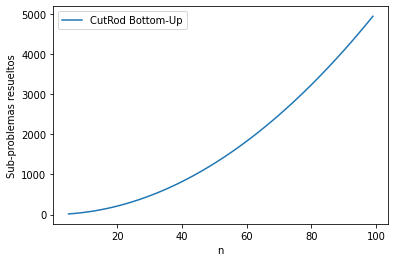

In [ ]:
x=[n for n in range(5,100)] 
y=[]; 

for n in range(5,100):
  a = cutrod_instance_generator(n)

  subProblemas = 0
  cutRod(a, len(a))

  y.append(subProblemas)

plt.plot(x,y)
plt.legend(["CutRod Bottom-Up"])

plt.xlabel('n')
plt.ylabel('Sub-problemas resueltos')
plt.show()

### Análisis de resultados

Como se puede ver en el gráfico anterior, la cantidad de sub-problemas resueltos aumenta en $n^2/2$ cada vez. Lo anterior se debe a que, como concluimos anteriormente, el algoritmo de compone de 2 sumatorias, cada una con complejidad $O(n)$. Cómo en este gráfico sólo estamos contando la cantidad de sub-problemas resueltos (segunda sumatoria/ciclo anidado), la cantidad de sub-problemas contabilizados será igual a $O(n^2)$ (complejidad de ambas sumatorias juntas) dividido en 2, ya que sólo nos centramos en una sola sumatoria y no en las 2. Esto se puede ver claramente cuando se trabaja con un n = 100, los problemas totales resueltos para este caso serían iguales a 10000, pero como sólo estamos calculando los sub-problemas resueltos, entonces el resultado es igual a 5000.